Name: 
Type: Graph
Number of nodes: 76
Number of edges: 85
Average degree:   2.2368


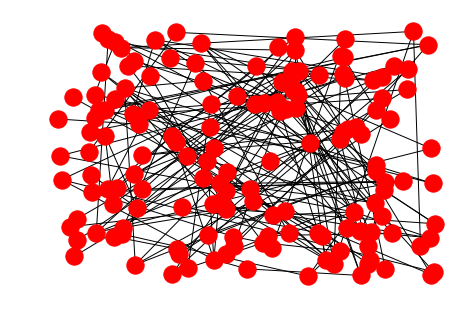

In [12]:
import networkx as nx
import matplotlib.pylab as plt
#graph=nx.read_weighted_edgelist("edgelist.txt")
graph=nx.read_edgelist("rawalpindibusroutes.txt")
print(nx.info(graph))
nx.draw_random(graph,show_labels=True)
nx.draw_random(graph)
plt.show()

Name: 
Type: Graph
Number of nodes: 76
Number of edges: 85
Average degree:   2.2368


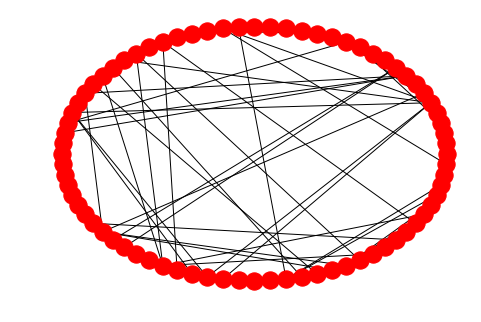

In [30]:
import networkx as nx
import matplotlib.pylab as plt
#graph=nx.read_weighted_edgelist("edgelist.txt")
graph=nx.read_edgelist("rawalpindibusroutes.txt")
print(nx.info(graph))
nx.draw_circular(graph)
plt.show()

Name: 
Type: Graph
Number of nodes: 76
Number of edges: 85
Average degree:   2.2368
Maximum degree= 8
Minimum degree= 1


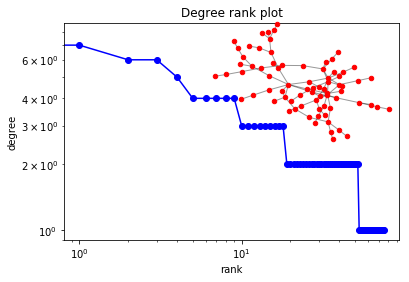

Average path length= 2.975


In [31]:
import networkx as nx
import matplotlib.pyplot as plt


G=nx.read_edgelist("rawalpindibusroutes.txt")

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
# print "Degree sequence", degree_sequence
dmax = max(degree_sequence)
dmin=min(degree_sequence)

plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
print(nx.info(G))
print("Maximum degree=",dmax)
print("Minimum degree=",dmin)
plt.show()
G=nx.path_graph("rawalpindibusroutes.txt")
print("Average path length=",nx.average_shortest_path_length(G))

In [24]:
#setup
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
# read edge list
g = nx.read_edgelist("rawalpindibusroutes.txt")
ug = nx.to_undirected(g)
# print basic info (is the graph ok?)
print(nx.info(ug))

Name: 
Type: GraphView
Number of nodes: 76
Number of edges: 85
Average degree:   2.2368


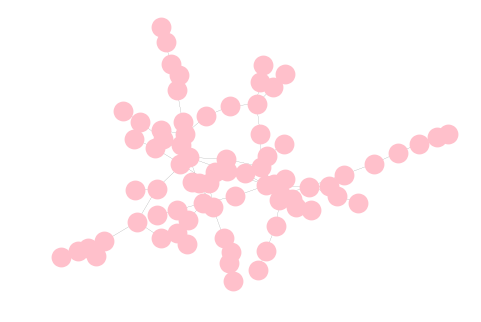

In [32]:
options = {
    'node_color': 'pink',
    'node_size': 140,
    'line_color': 'blue',
    'linewidths': 8,
    'width': 0.1,
}
nx.draw(ug, **options)
plt.savefig ("simple_graph.png")

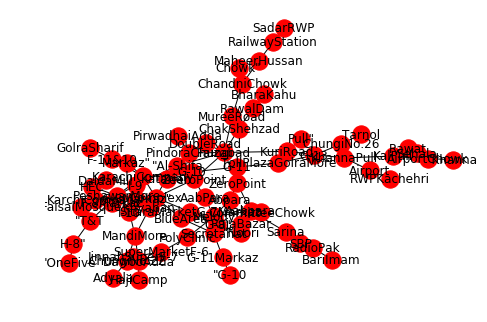

In [33]:
# draw a network with labels
options = {
    'node_color': 'Green',
    'node_size': 80,
    'line_color': 'Yellow',
    'linewidths': 7,
    'width': 0.1,
}
nx.draw(ug, with_labels=True)

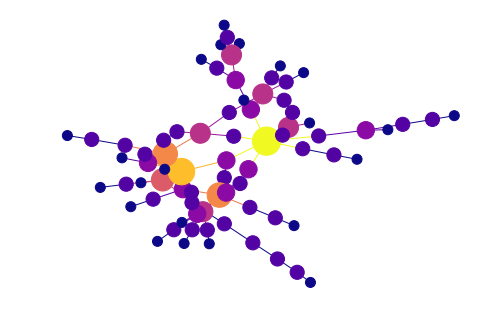

In [28]:
# set color and size of nodes as per degree of each node


d = [] # create a set
for n in ug.nodes():
    d.append(ug.degree(n))
    
ec = [] # create a set
for e in ug.edges():
    if(ug.degree(e[0]) > ug.degree(e[1])):
        ec.append(ug.degree(e[0]))
    else:
        ec.append(ug.degree(e[1]))
    
pos = nx.spring_layout(ug, iterations=100)

factor = 100 # to change the size of nodes with respect to their degree


# choose color plate from https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# example: viridis
nx.draw(ug, pos,
        edge_color = ec,  edge_cmap=plt.cm.plasma,  # edge color
        node_color = d, cmap=plt.cm.plasma, # node color
        node_size=[x * factor for x in d]) # node sizse